# **Context**
An automobile company has plans to enter new markets with their existing products. After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation/Train.csv
/kaggle/input/customer-segmentation/Test.csv


In [2]:
data= pd.read_csv("/kaggle/input/customer-segmentation/Train.csv")
data_test=pd.read_csv("/kaggle/input/customer-segmentation/Test.csv")
df= data.copy()
df_test=data_test.copy()

dfmaster=pd.concat([df,df_test], axis=0)
dfmaster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
dfmaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [4]:
dfmaster.shape

(10695, 11)

 **We have 10,695 total rows and 10 columns**
 
7 categorical:
*   Gender of the customer
*   Marital status of the customer
*   Is the customer a graduate?
*   Profession of the customer
*   Spending score of the customer
*   Var_1: Anonymised Category for the customer
*   **Segmentation (target)**

4 numerical:

*   ID
*   Age of customer
*   Work Experience in years
*   Number of family members for the customer (including the customer)



  







# Missing and duplicated values

In [5]:
#Missing values?
dfmaster.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

<AxesSubplot:>

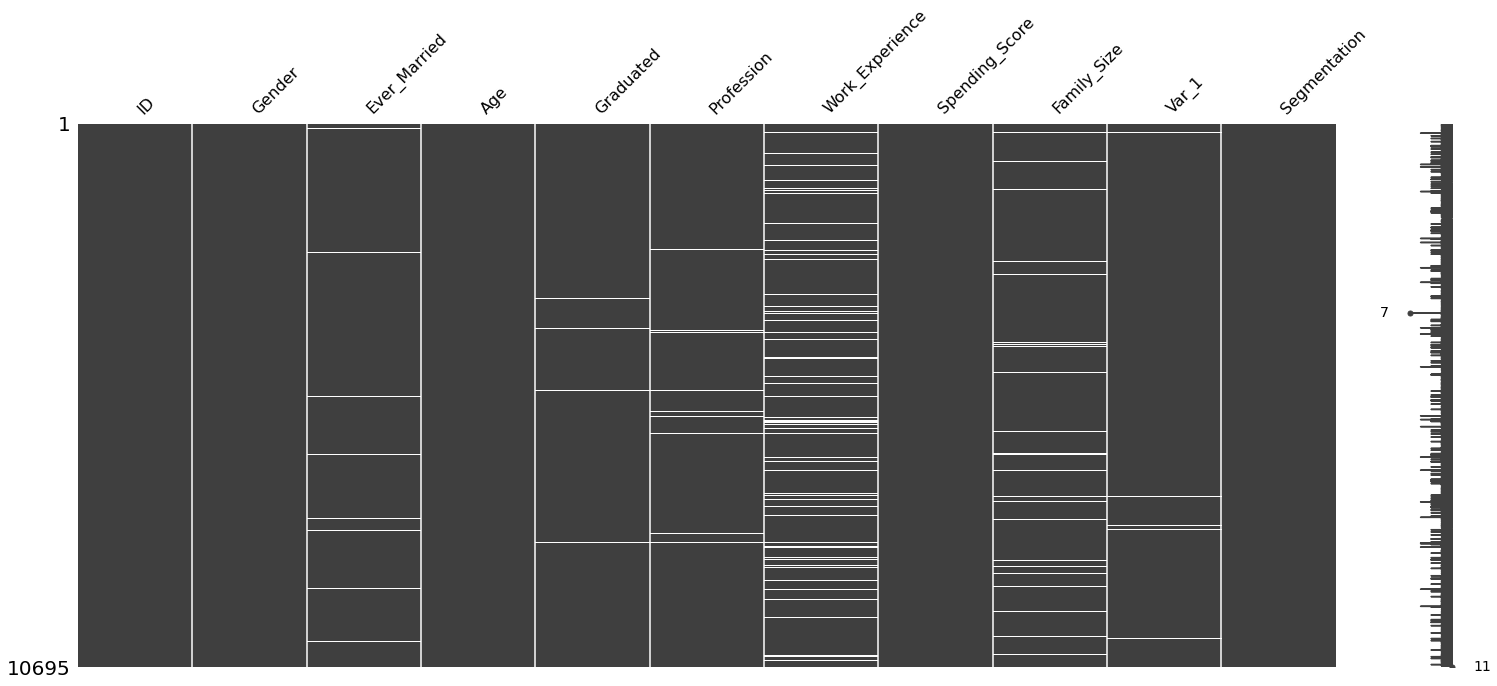

In [6]:
msno.matrix(dfmaster)

In [7]:
#Hay duplicados?
dfmaster.duplicated().sum()

38

**There is missing data on the marital status of the clients, if they are graduates, what is their profession, their work experience (too many), the size of their family and the anonymous variable. These values must be treated next and in turn, eliminate duplicates**

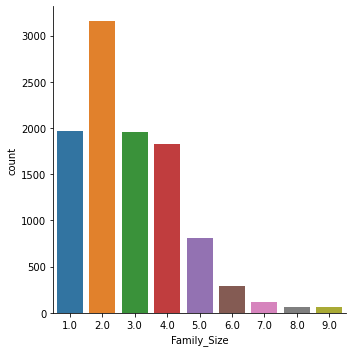

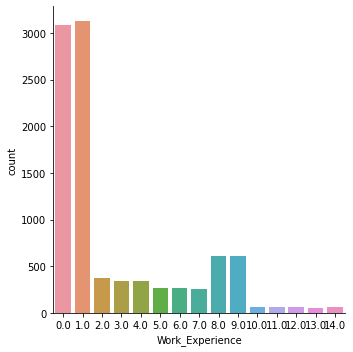

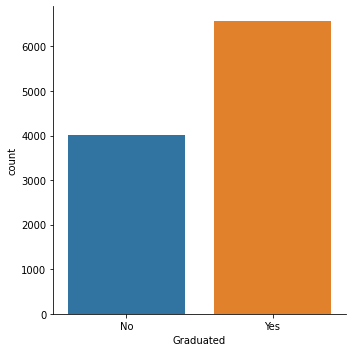

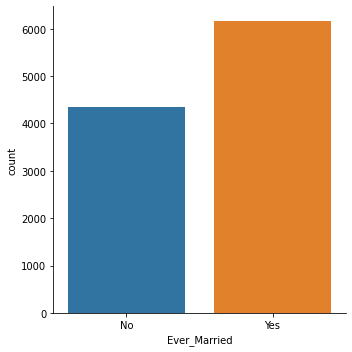

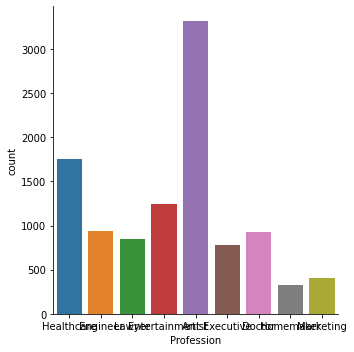

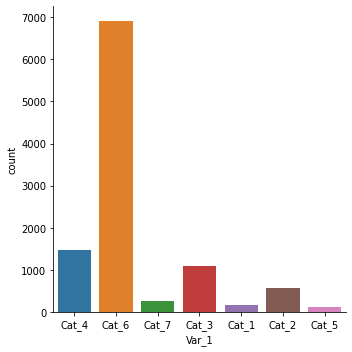

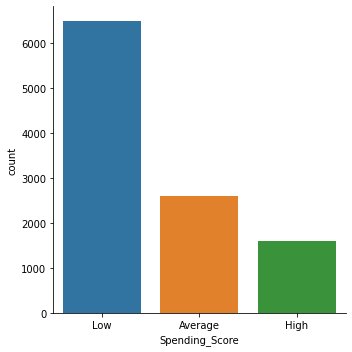

In [8]:
sns.catplot(x="Family_Size",kind="count",data=dfmaster)
sns.catplot(x="Work_Experience",kind="count",data=dfmaster)
sns.catplot(x="Graduated",kind="count",data=dfmaster)
sns.catplot(x="Ever_Married",kind="count",data=dfmaster)
sns.catplot(x="Profession",kind="count",data=dfmaster)
sns.catplot(x="Var_1",kind="count",data=dfmaster)
sns.catplot(x="Spending_Score",kind="count",data=dfmaster)

**Remove duplicated rows**


In [9]:
dfmaster.drop_duplicates()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


**Treat missing values:**
*   We will eliminate the Work_Experience column, because if we look for its correlation with Segmentation later, it does not have much relevance for a potential prediction.
*   We'll fill the Ever_Married and Graduated missing values with "No"
*   For Var_1 and Profession remove rows with missing values
*   Family_Size impute with mean


In [10]:
dfmaster.drop(["Work_Experience"],axis=1, inplace=True)
dfmaster["Ever_Married"].fillna("No", inplace=True)
dfmaster["Graduated"].fillna("No", inplace=True)
dfmaster.dropna(subset=["Profession"], inplace=True)
dfmaster.dropna(subset=["Var_1"], inplace=True)
dfmaster["Family_Size"].fillna(dfmaster["Family_Size"].mean(), inplace=True)

In [11]:
dfmaster.isnull().sum()

ID                0
Gender            0
Ever_Married      0
Age               0
Graduated         0
Profession        0
Spending_Score    0
Family_Size       0
Var_1             0
Segmentation      0
dtype: int64

# Encoding

One Hot Encoding for Gender, Ever_Married, Graduated and Spending_Score. Label Encoding for the rest.

In [12]:
dfclean= dfmaster.copy()

In [13]:
#Gender
gendummy=pd.get_dummies(dfclean.Gender)
dfclean = pd.concat([dfclean, gendummy], axis=1)
dfclean.drop(["Gender"],axis=1, inplace=True)

In [14]:
#Ever_Married
mardummy=pd.get_dummies(dfclean.Ever_Married,prefix="Married")
dfclean = pd.concat([dfclean, mardummy], axis=1)
dfclean.drop(["Ever_Married"],axis=1, inplace=True)

In [15]:
#Graduated
gradummy=pd.get_dummies(dfclean.Graduated,prefix="Graduated")
dfclean = pd.concat([dfclean, gradummy], axis=1)
dfclean.drop(["Graduated"],axis=1, inplace=True)

In [16]:
#Spending Score
spedummy=pd.get_dummies(dfclean.Spending_Score,prefix="Spending_Score")
dfclean = pd.concat([dfclean, spedummy], axis=1)
dfclean.drop(["Spending_Score"],axis=1, inplace=True)

In [17]:
C=["Female","Married_No","Graduated_No","Spending_Score_Average"]
dfclean=dfclean.drop(C,axis=1)

In [18]:
#Profession, Var_1 and Segmentation
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
dfclean['Profession'] = labelencoder.fit_transform(dfclean['Profession'])
dfclean['Var_1'] = labelencoder.fit_transform(dfclean['Var_1'])
dfclean['Segmentation'] = labelencoder.fit_transform(dfclean['Segmentation'])

In [19]:
dfclean.head()

,ID,Age,Profession,Family_Size,Var_1,Segmentation,Male,Married_Yes,Graduated_Yes,Spending_Score_High,Spending_Score_Low
0,462809,22,5,4.0,3,3,1,0,0,0,1
1,462643,38,2,3.0,3,0,0,1,1,0,0
2,466315,67,2,1.0,5,1,0,1,1,0,1
3,461735,67,7,2.0,5,1,1,1,1,1,0
4,462669,40,3,6.0,5,0,0,1,1,1,0


In [20]:
'''def decodificar(datos):
  gendummy=pd.get_dummies(datos.Gender)
  datos = pd.concat([datos, gendummy], axis=1)
  datos.drop(["Gender"],axis=1, inplace=True)

  mardummy=pd.get_dummies(datos.Ever_Married,prefix="Married").astype(int)
  datos = pd.concat([datos, mardummy], axis=1)
  datos.drop(["Ever_Married"],axis=1, inplace=True)

  gradummy=pd.get_dummies(datos.Graduated,prefix="Graduated").astype(int)
  datos = pd.concat([datos, gradummy], axis=1)
  datos.drop(["Graduated"],axis=1, inplace=True)

  from sklearn.preprocessing import LabelEncoder
  labelencoder=LabelEncoder()
  datos['Profession'] = labelencoder.fit_transform(datos['Profession']).astype(int)
  datos['Var_1'] = labelencoder.fit_transform(datos['Var_1']).astype(int)
  datos['Segmentation'] = labelencoder.fit_transform(datos['Segmentation']).astype(int)
  datos['Spending_Score'] = labelencoder.fit_transform(datos['Spending_Score']).astype(int)


  return datos'''

'def decodificar(datos):\n  gendummy=pd.get_dummies(datos.Gender)\n  datos = pd.concat([datos, gendummy], axis=1)\n  datos.drop(["Gender"],axis=1, inplace=True)\n\n  mardummy=pd.get_dummies(datos.Ever_Married,prefix="Married").astype(int)\n  datos = pd.concat([datos, mardummy], axis=1)\n  datos.drop(["Ever_Married"],axis=1, inplace=True)\n\n  gradummy=pd.get_dummies(datos.Graduated,prefix="Graduated").astype(int)\n  datos = pd.concat([datos, gradummy], axis=1)\n  datos.drop(["Graduated"],axis=1, inplace=True)\n\n  from sklearn.preprocessing import LabelEncoder\n  labelencoder=LabelEncoder()\n  datos[\'Profession\'] = labelencoder.fit_transform(datos[\'Profession\']).astype(int)\n  datos[\'Var_1\'] = labelencoder.fit_transform(datos[\'Var_1\']).astype(int)\n  datos[\'Segmentation\'] = labelencoder.fit_transform(datos[\'Segmentation\']).astype(int)\n  datos[\'Spending_Score\'] = labelencoder.fit_transform(datos[\'Spending_Score\']).astype(int)\n\n\n  return datos'

# Describe and Correlation

In [21]:
dfclean.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10428.0,463476.841580,2597.527224,458982.0,461237.0,463460.500000,465730.25,467974.0
Age,10428.0,43.518412,16.781320,18.0,30.0,41.000000,53.00,89.0
Profession,10428.0,2.798907,2.547361,0.0,0.0,3.000000,5.00,8.0
Family_Size,10428.0,2.845701,1.505484,1.0,2.0,2.845701,4.00,9.0
Var_1,10428.0,4.139241,1.420298,0.0,3.0,5.000000,5.00,6.0
Segmentation,10428.0,1.529728,1.157070,0.0,0.0,2.000000,3.00,3.0
Male,10428.0,0.546701,0.497838,0.0,0.0,1.000000,1.00,1.0
Married_Yes,10428.0,0.576237,0.494177,0.0,0.0,1.000000,1.00,1.0
Graduated_Yes,10428.0,0.617952,0.485912,0.0,0.0,1.000000,1.00,1.0
Spending_Score_High,10428.0,0.150652,0.357727,0.0,0.0,0.000000,0.00,1.0



1.  The age is between 18 and 89 years old, with an average of 43 and 75% of the clients do not exceed 53
2.   Half of clients have 1 year of work experience
3. Average family size is 2 people




In [22]:
dfclean.corr()["Segmentation"]

ID                    -0.007264
Age                   -0.199566
Profession             0.174138
Family_Size            0.147846
Var_1                 -0.013724
Segmentation           1.000000
Male                   0.018651
Married_Yes           -0.176134
Graduated_Yes         -0.141847
Spending_Score_High   -0.058899
Spending_Score_Low     0.092968
Name: Segmentation, dtype: float64

<AxesSubplot:>

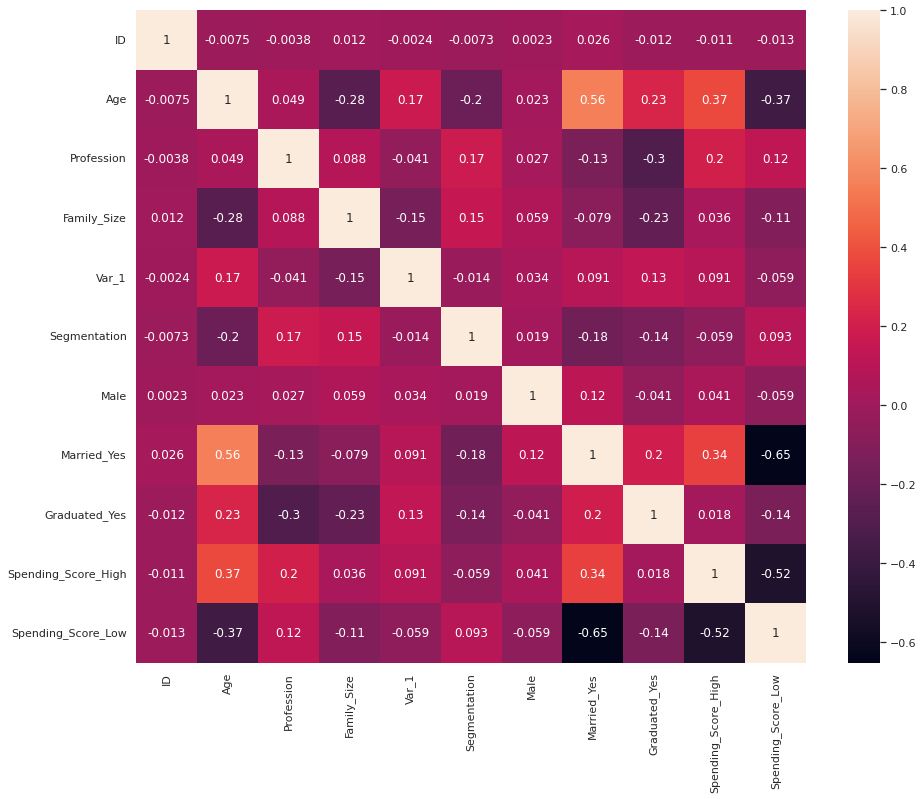

In [23]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(dfclean.corr(),annot=True)

**Observations:**
*   There does not seem to be a strong relationship between the variables and our target
*   Even so, ***Age***, ***marital status*** and ***profession*** affect segmentation slightly
*  Age and being married have a notorious relationship, as well as being married with the spending socre
* Var_1 and ID do not seem to add value to the prediction 






In [24]:
dfclean.drop(["ID"],axis=1,inplace=True)
dfclean.drop(["Var_1"],axis=1,inplace=True)

# EDA

In [25]:
#sns.set(rc={'figure.figsize':(15,12)})
#sns.pairplot(dfmaster, hue="Segmentation", height=3,aspect=2)

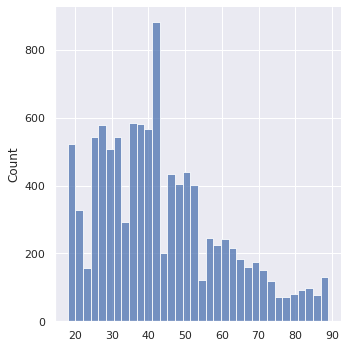

In [26]:
sns.displot(data=dfmaster.Age.values)

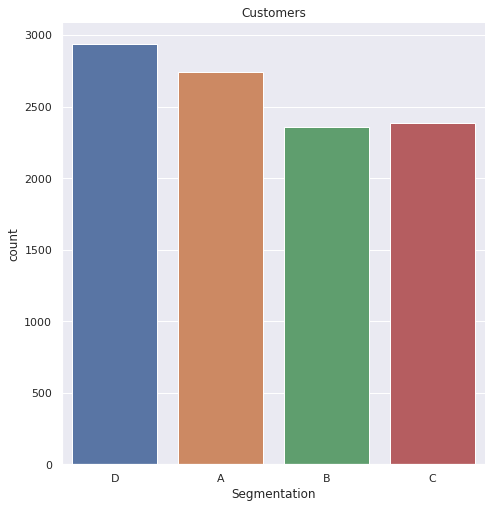

In [27]:
sns.catplot(x="Segmentation",data=dfmaster,kind="count",height=7).set(title='Customers')

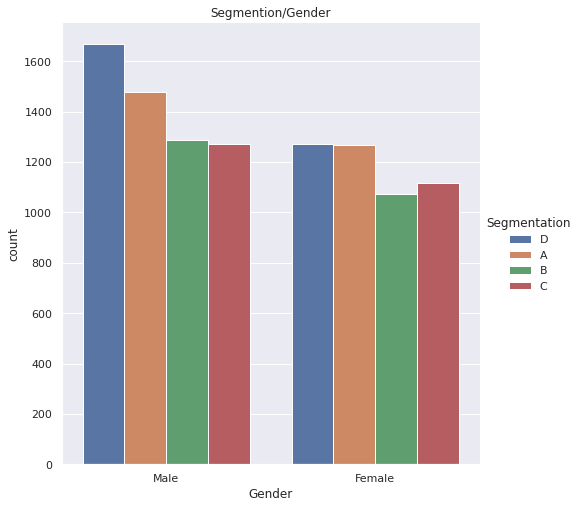

In [28]:
sns.catplot(x="Gender",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmention/Gender')

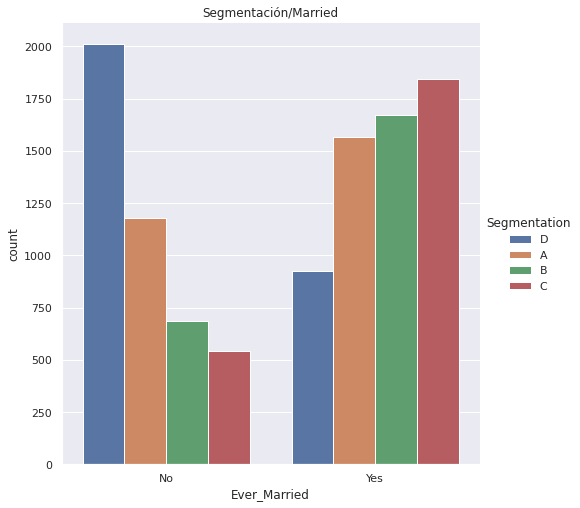

In [29]:
sns.catplot(x="Ever_Married",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmentación/Married')

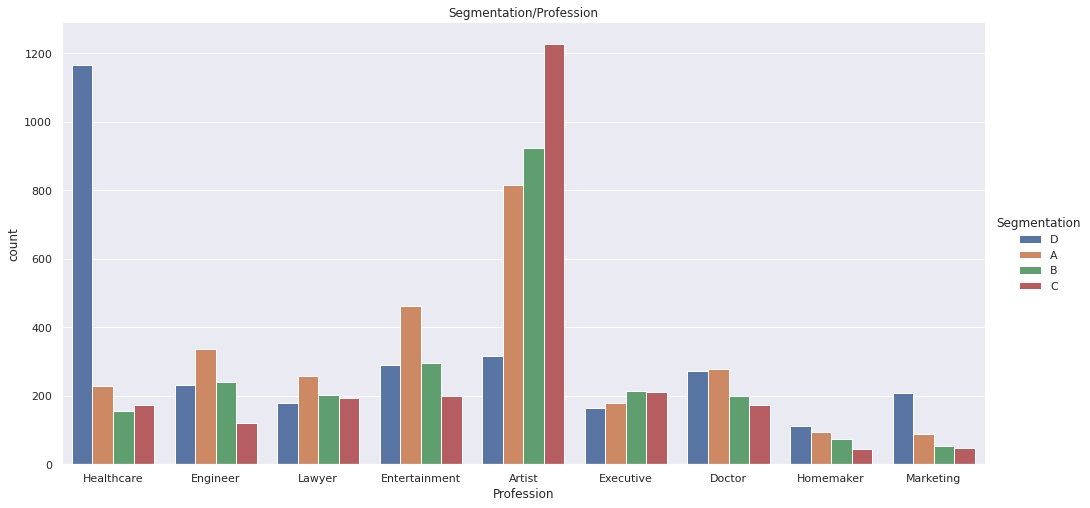

In [30]:
sns.catplot(x="Profession",hue="Segmentation",data=dfmaster,kind="count",height=7,aspect=2).set(title='Segmentation/Profession')

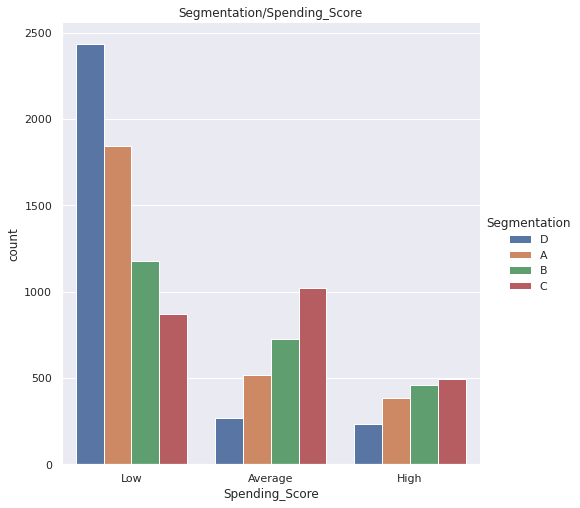

In [31]:
sns.catplot(x="Spending_Score",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmentation/Spending_Score')

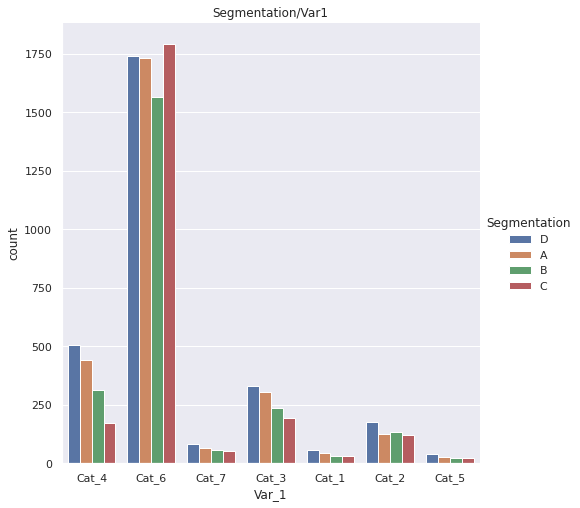

In [32]:
sns.catplot(x="Var_1",hue="Segmentation",data=dfmaster,kind="count",height=7).set(title='Segmentation/Var1')

# Model

In [40]:

from sklearn.model_selection import train_test_split

seed=777

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


lr = LogisticRegression(n_jobs = -1)
svc = SVC() 
knn = KNeighborsClassifier(n_jobs= -1)
rf = RandomForestClassifier(n_jobs = -1)
xgb = XGBClassifier(n_jobs = -1)
gb=GradientBoostingClassifier()
abc=AdaBoostClassifier()


In [41]:
X= dfclean.drop(["Segmentation"],axis=1)
Y= dfclean.Segmentation
X.head()

,Age,Profession,Family_Size,Male,Married_Yes,Graduated_Yes,Spending_Score_High,Spending_Score_Low
0,22,5,4.0,1,0,0,0,1
1,38,2,3.0,0,1,1,0,0
2,67,2,1.0,0,1,1,0,1
3,67,7,2.0,1,1,1,1,0
4,40,3,6.0,0,1,1,1,0


In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [43]:
#Por defecto el metodo score retorna el coeficiente de determinacion R^2
def entrenar(model):
    model.fit(X_train, y_train)
    return (model.score(X_train, y_train),model.score(X_test, y_test))
    #return model.score(X_test, y_test)

#Entrenamos
modelos = {'LogisticRegression': lr,
          'KNeighborsClassifier': knn,
          'SVC': svc,
          'RandomForestClassifier': rf,
          'XGBClassifier': xgb,
          'GradientBoostingClassifier': gb,
          'AdaBoostClassifier': abc}
scores={}
train_scores={}
for nombre, modelo in modelos.items():
    scores[nombre]=entrenar(modelo)[1]
    train_scores[nombre]=entrenar(modelo)[0]

scores.items()

[16:26:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


dict_items([('LogisticRegression', 0.4606903163950144), ('KNeighborsClassifier', 0.42233940556088206), ('SVC', 0.45254074784276127), ('RandomForestClassifier', 0.41850431447746883), ('XGBClassifier', 0.4707574304889741), ('GradientBoostingClassifier', 0.49760306807286675), ('AdaBoostClassifier', 0.49041227229146694)])

In [44]:
scores = pd.DataFrame(scores,index=['Score']).transpose()
scores = scores.sort_values('Score')

train_scores = pd.DataFrame(train_scores,index=['Train Score']).transpose()
train_scores = train_scores.sort_values('Train Score')

In [45]:
cm = sns.color_palette('flare',as_cmap=True)
scores = scores.style.background_gradient(cmap=cm)
scores

,Score
RandomForestClassifier,0.418504
KNeighborsClassifier,0.422339
SVC,0.452541
LogisticRegression,0.460690
XGBClassifier,0.470757
AdaBoostClassifier,0.490412
GradientBoostingClassifier,0.497603


In [46]:
train_scores.style.background_gradient(cmap=cm)

,Train Score
SVC,0.439942
LogisticRegression,0.452170
AdaBoostClassifier,0.471829
GradientBoostingClassifier,0.523256
KNeighborsClassifier,0.589667
XGBClassifier,0.641932
RandomForestClassifier,0.790578


In [47]:
#Be careful with overfitting!

# Conclusion

To help the business adopt the best marketing strategies for each of its clients applying segmentation, we approach the process from the definition of the business objective, data collection, exploration, understanding of correlations, processing and selection of relevant features, the modeling and implementation of machine learning algorithms.


---


The chosen model was GradienteBoostingClassifier for being the most precise, although it does not present a great precision like the rest.
We could come up with a more robust model if we get more data about the customers, it's something to consider in the organization with the business team and the data engineer to explore if there are more relevant features available.